In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
%matplotlib inline
pc.config.cloudy_exe = '/usr/local/Cloudy/c17.01/source/cloudy.exe'

The following grid of models obtained by use of "varying" in the input file are reproduced using pyCloudy

In [2]:
# A function is defined that print out the input file, depending on the metallicity
def make_varyZ(Z):
    Min = pc.CloudyInput('../models/varyZ_{}'.format(Z))
    Min.set_BB(Teff=4e4, lumi_unit='Ionization parameter', lumi_value=-2)
    Min.set_cste_density(0)
    Min.set_stop(('zone = 1'))
    Min.set_emis_tab(('O  3 5006.84A', 'H  1 4861.36A', 'O  3 88.3323m'))
    Min.set_other(('metals {} log'.format(Z), 
                   'set dr 0', 
                   'Cosmic Rays Background'))
    Min.print_input()

In [3]:
# A grid of model files is produced
for Z in np.arange(-2, 1.1, 0.25):
    make_varyZ(Z)

In [4]:
# Running the models using 4 threads
pc.run_cloudy(dir_='../models', n_proc=4, use_make=True)

In [13]:
# Read the models into a list of CloudyModel objects
Ms = pc.load_models('../models/varyZ')
Ms = sorted(Ms, key=lambda x:x.abund['O'])

In [14]:
# The lables of the emission lines are obtained from the first model.
# They are the same in the other models
Ms[0].emis_labels

array(['O__3_500684A', 'H__1_486136A', 'O__3_883323M'], 
      dtype='<U12')

In [16]:
# Obtain the integrated emissivity ovee the volume (the line intensity).
# Normalize it to Hbeta
# Put all this into lists. The same for the Oxygen abundance
O3Hb = [M.get_emis_vol('O__3_500684A') / M.get_emis_vol('H__1_486136A') for M in Ms]
O3HbIR = [M.get_emis_vol('O__3_883323M') / M.get_emis_vol('H__1_486136A') for M in Ms]
OH = [M.abund['O'] for M in Ms]

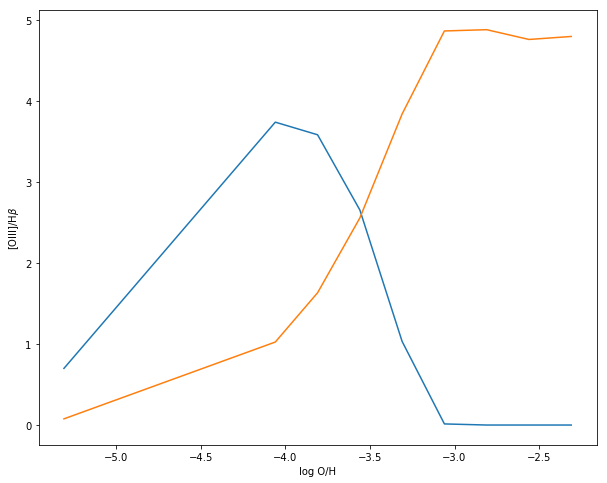

In [17]:
f, ax = plt.subplots(figsize=(10,8))
ax.plot(OH, O3Hb)
ax.plot(OH, O3HbIR)
ax.set_xlabel('log O/H')
ax.set_ylabel(r'[OIII]/H$\beta$');

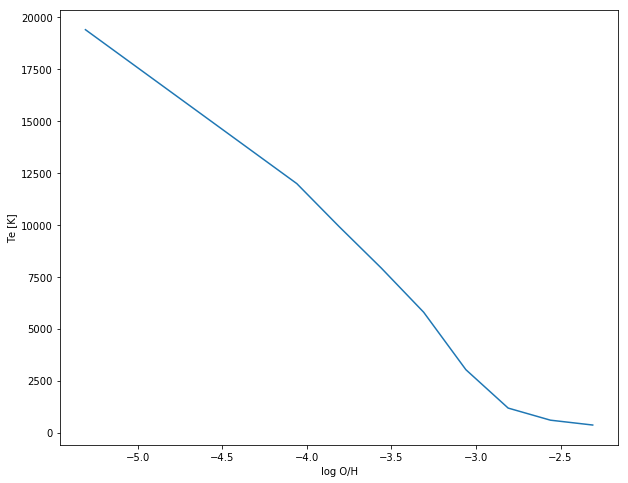

In [18]:
# Electron temperature depends on the metallicity
T0 = [M.T0 for M in Ms]
f, ax = plt.subplots(figsize=(10,8))
ax.plot(OH, T0)
ax.set_xlabel('log O/H')
ax.set_ylabel('Te [K]');